In [1]:
# import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
import cv2 as cv
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#Create a DF that holds the image name, the covid results as well as the path to the file
levels = ['Normal', 'COVID']
path = "C:/Users/alanp/Documents/Projects/CovidAnalysis/Data"
data_dir = os.path.join(path)

data = []
for id, level in enumerate(levels):
    for file in os.listdir(os.path.join(data_dir, level)):
        data.append([f'{level}/{file}', level])
data = pd.DataFrame(data, columns = ['image_file', 'results'])
data['results'] = data['results'].map({'Normal':'Negative', 'COVID':'Positive'})
data['path'] = path + '/' + data['image_file']

sample_size = len(data)
data.head()

,image_file,results,path
0,Normal/Normal-1.png,Negative,C:/Users/alanp/Documents/Projects/CovidAnalysi...
1,Normal/Normal-10.png,Negative,C:/Users/alanp/Documents/Projects/CovidAnalysi...
2,Normal/Normal-100.png,Negative,C:/Users/alanp/Documents/Projects/CovidAnalysi...
3,Normal/Normal-1000.png,Negative,C:/Users/alanp/Documents/Projects/CovidAnalysi...
4,Normal/Normal-10000.png,Negative,C:/Users/alanp/Documents/Projects/CovidAnalysi...


In [3]:
"""Create a quick function that takes in an image path and returns a greyscale resized image """
def read_resize_grayscale(image_path):
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    img = cv.resize(img, (100, 100), cv.INTER_AREA)
    return img

In [4]:
'''Create a new column in the dataframe that containes the image pixel information. Also resizes and grayscales'''

data['image'] = data['path'].apply(read_resize_grayscale)

In [5]:
#Now we have data that has the greyscale iamge, the file path, file itself and the results (pos/neg)
data.head()

,image_file,results,path,image
0,Normal/Normal-1.png,Negative,C:/Users/alanp/Documents/Projects/CovidAnalysi...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,Normal/Normal-10.png,Negative,C:/Users/alanp/Documents/Projects/CovidAnalysi...,"[[9, 9, 9, 9, 8, 8, 8, 7, 6, 5, 5, 4, 3, 2, 1,..."
2,Normal/Normal-100.png,Negative,C:/Users/alanp/Documents/Projects/CovidAnalysi...,"[[0, 0, 0, 0, 0, 0, 29, 61, 76, 81, 105, 110, ..."
3,Normal/Normal-1000.png,Negative,C:/Users/alanp/Documents/Projects/CovidAnalysi...,"[[0, 0, 16, 30, 43, 64, 67, 69, 73, 66, 65, 12..."
4,Normal/Normal-10000.png,Negative,C:/Users/alanp/Documents/Projects/CovidAnalysi...,"[[145, 134, 124, 116, 113, 109, 106, 104, 101,..."


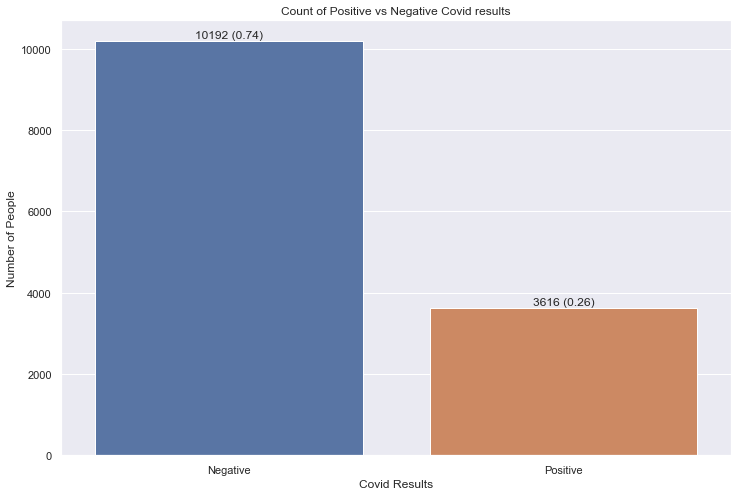

In [6]:
#Look at the data to see how many positive and negative images we have
sns.set(style='darkgrid')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
sns.countplot(data=data, x='results')
ax.set_title("Count of Positive vs Negative Covid results")
ax.set_xlabel('Covid Results')
ax.set_ylabel('Number of People')

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    perc = y_value / sample_size
    space = 1
    label = f'{y_value} ({perc:.2f})'
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords='offset points', ha='center', va='bottom')
    
plt.show()

Image Dimension    : (100, 100)
Image Height       : 100
Image Width        : 100
Result             : Negative


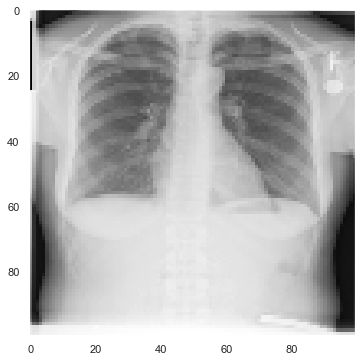

In [7]:
#Example of the images we have, also has the dimensions and whether it is positive or negative
img = data.loc[2345,('image')]
results = data.loc[2345, ('results')]
fig = plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.grid(False)
dim = img.shape
h, w = img.shape
size = len(img)
print(f'Image Dimension    : {dim}')
print(f'Image Height       : {h}')
print(f'Image Width        : {w}')
print(f'Result             : {results}')

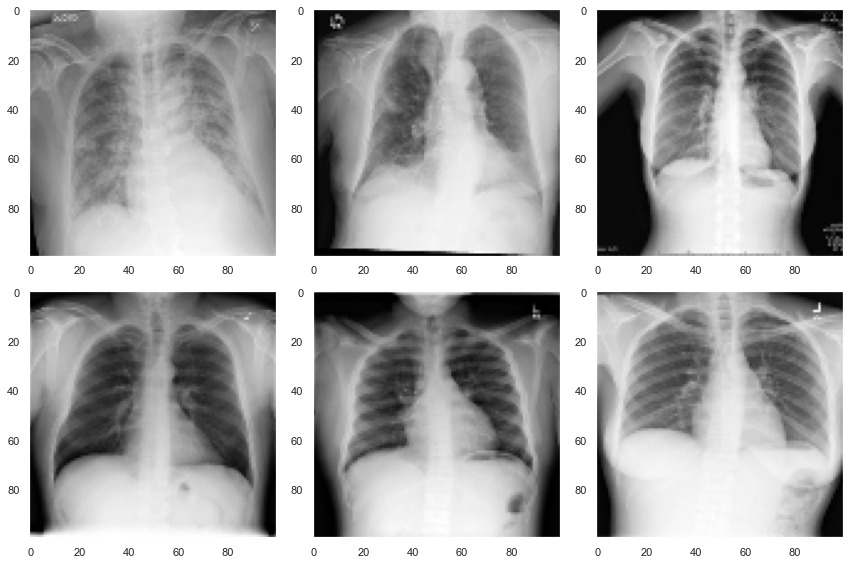

In [8]:
#example graph of positive and negative images
positive = data[data['results'] == 'Positive']
negative = data[data['results'] == 'Negative']


image_p1 = positive.iloc[1, 3]
image_p2 = positive.iloc[100, 3]
image_p3 = positive.iloc[1000, 3]

image_n1 = negative.iloc[1, 3]
image_n2 = negative.iloc[100, 3]
image_n3 = negative.iloc[1000, 3]
fig = plt.figure(figsize=(12,8))

fig.add_subplot(2, 3, 1)
plt.grid(False)
plt.imshow(image_p1, cmap='gray')

fig.add_subplot(2, 3, 2)
plt.grid(False)
plt.imshow(image_p2, cmap='gray')

fig.add_subplot(2, 3, 3)
plt.grid(False)
plt.imshow(image_p3, cmap='gray')

fig.add_subplot(2, 3, 4)
plt.grid(False)
plt.imshow(image_n1, cmap='gray')

fig.add_subplot(2, 3, 5)
plt.grid(False)
plt.imshow(image_n2, cmap='gray')

fig.add_subplot(2, 3, 6)
plt.grid(False)
plt.imshow(image_n3, cmap='gray')

fig.tight_layout()

In [9]:
#Get mean, std, max, and min pixel intensity for each image
mean_val = []
std_val = []
max_val = []
min_val = []

for i in range(0, sample_size):
    mean_val.append(data['image'][i].mean())
    std_val.append(data['image'][i].std())
    max_val.append(data['image'][i].max())
    min_val.append(data['image'][i].min())
#add those to an EDA dataframe with the respective positive or negative result
EDA_df = data.loc[:, ('results')].to_frame()
EDA_df['mean'] = mean_val
EDA_df['std'] = std_val
EDA_df['max'] = max_val
EDA_df['min'] = min_val
EDA_df.head()

,results,mean,std,max,min
0,Negative,85.0201,71.345431,-23,0
1,Negative,128.4005,65.263059,-6,0
2,Negative,125.5413,59.604083,-18,0
3,Negative,113.5848,54.423613,-32,0
4,Negative,131.2158,65.752445,-8,0


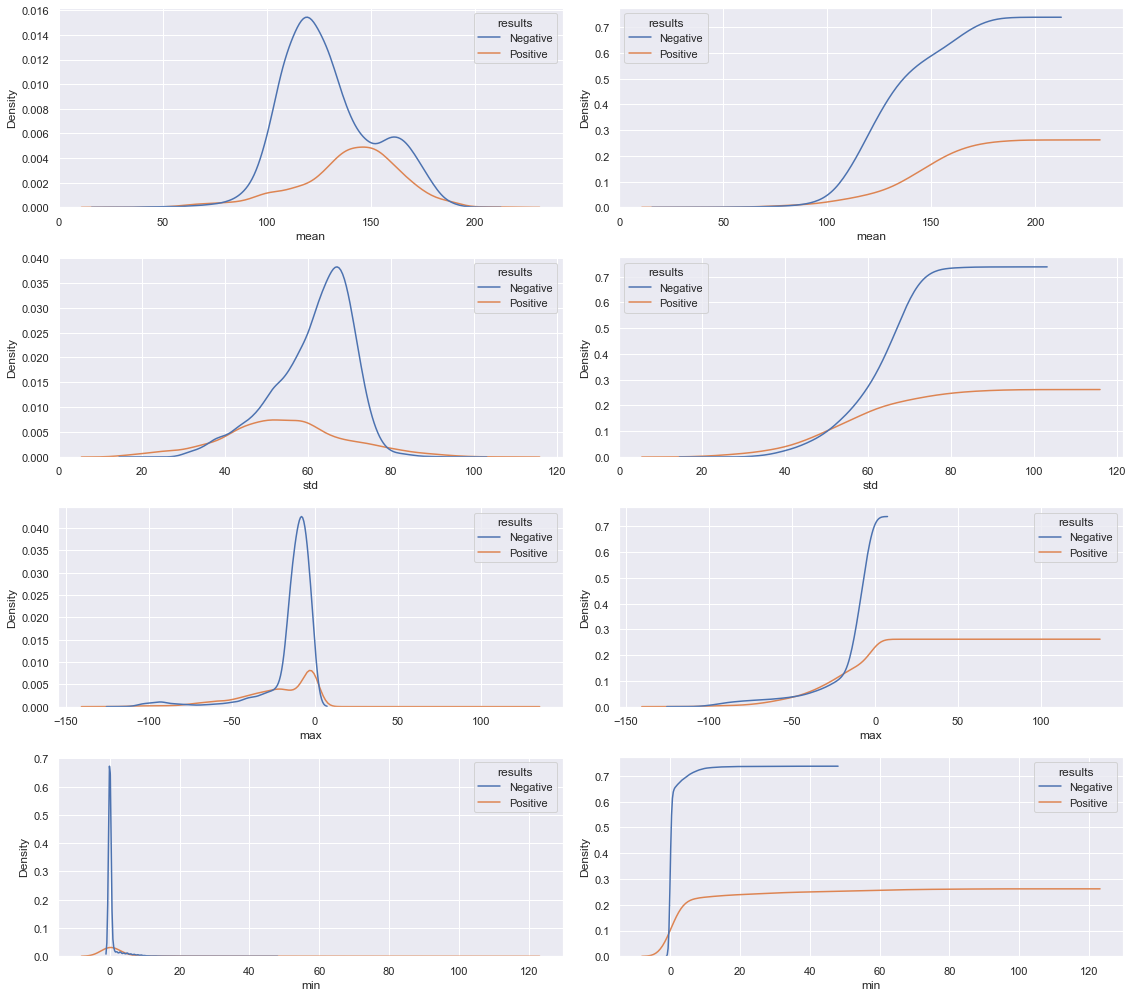

In [10]:
#plot KDE plots to see if there's a difference in pixel intensity between positive and negative intensities
fig = plt.figure(figsize=(16,14))
fig.add_subplot(421)
sns.kdeplot(data=EDA_df, x='mean', hue='results')

fig.add_subplot(422)
sns.kdeplot(data=EDA_df, x='mean', hue='results', cumulative=True )


fig.add_subplot(423)
sns.kdeplot(data=EDA_df, x='std', hue='results')

fig.add_subplot(424)
sns.kdeplot(data=EDA_df, x='std', hue='results', cumulative=True)

fig.add_subplot(425)
sns.kdeplot(data=EDA_df, x='max', hue='results')

fig.add_subplot(426)
sns.kdeplot(data=EDA_df, x='max', hue='results', cumulative=True)

fig.add_subplot(427)
sns.kdeplot(data=EDA_df, x='min', hue='results')

fig.add_subplot(428)
sns.kdeplot(data=EDA_df, x='min', hue='results', cumulative=True)

fig.tight_layout()


<AxesSubplot:title={'center':'Scatter plot of Average Pixel Intensity vs Standard Deviation of Pixel Intensity'}, xlabel='mean', ylabel='std'>

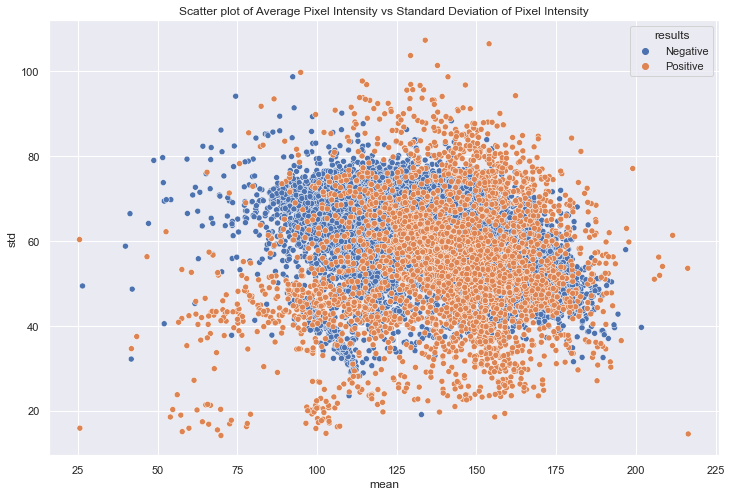

In [11]:
#Scatterplot of the average pixel intesity vs Standard Deviation pixel intensity divided between positive and negative results
fig = plt.figure(figsize=(12,8))
plt.title('Scatter plot of Average Pixel Intensity vs Standard Deviation of Pixel Intensity')
sns.scatterplot(data=EDA_df, x='mean', y='std', hue='results')

In [12]:
#Now we want to test different image manipulations to see differences
#Create a dataframe that only has the results and the image
model_data = data.loc[:, ('results', 'image')]
model_data['results'] = data['results'].apply(lambda x: 0 if (x=='Negative') else 1)
model_data.head()

,results,image
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[9, 9, 9, 9, 8, 8, 8, 7, 6, 5, 5, 4, 3, 2, 1,..."
2,0,"[[0, 0, 0, 0, 0, 0, 29, 61, 76, 81, 105, 110, ..."
3,0,"[[0, 0, 16, 30, 43, 64, 67, 69, 73, 66, 65, 12..."
4,0,"[[145, 134, 124, 116, 113, 109, 106, 104, 101,..."


In [13]:
y = []
X = []
for row in range(len(model_data)):
    y.append(model_data.loc[row, ('results')])
    X.append(model_data.loc[row, ('image')])

In [14]:
def image_manipulation(kernel, image_list):
    manipulated_list = []
    for row in range(len(image_list)):    
        manipulated_image = cv.filter2D(image_list[row], ddepth=-1, kernel=kernel)
        manipulated_list.append(manipulated_image)
    return manipulated_list

In [15]:
#keep track of different kernels used
sharpen_edges = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
gaussian = np.array([[1/16, 1/8, 1/16], 
    [1/8, 1/4, 1/8], 
    [1/16, 1/8, 1/16]])

In [16]:
#Split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#Turn data into np array
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

X_train = X_train/255
X_test = X_test/255

#blur and sharpen images as possible image manipulations
X_train_blur = image_manipulation(gaussian, X_train)
X_test_blur = image_manipulation(gaussian, X_test)

X_train_sharpen = image_manipulation(sharpen_edges, X_train)
X_test_sharpen = image_manipulation(sharpen_edges, X_test)

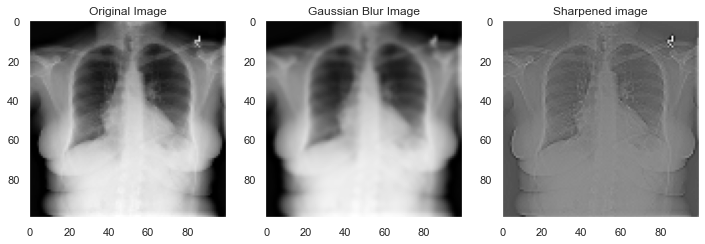

In [17]:
#Plot the three different types we are using

fig = plt.figure(figsize=(12,8))

fig.add_subplot(1, 3, 1)
plt.grid(False)
plt.title('Original Image')
plt.imshow(X_train[0], cmap='gray')

fig.add_subplot(1, 3, 2)
plt.title('Gaussian Blur Image')
plt.grid(False)
plt.imshow(X_train_blur[0], cmap='gray')

fig.add_subplot(1, 3, 3)
plt.title('Sharpened image')
plt.grid(False)
plt.imshow(X_train_sharpen[0], cmap='gray')

In [18]:
#turn y_train and y_test into numpy
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
#reshape data
X_train = np.reshape(X_train, (-1, 10000))
X_test = np.reshape(X_test, (-1, 10000))
#reshape blur
X_train_blur = np.reshape(X_train_blur, (-1, 10000))
X_test_blur = np.reshape(X_test_blur, (-1, 10000))
#reshape sharpen
X_train_sharpen = np.reshape(X_train_sharpen, (-1, 10000))
X_test_sharpen = np.reshape(X_test_sharpen, (-1, 10000))

In [19]:
#quick model for the original data
model_original = keras.Sequential()
#first layer
model_original.add(Dense(128, activation='relu', input_shape=(10000,)))
#second layer
model_original.add(Dense(128, activation='relu'))
# Output layer
model_original.add(Dense(1, activation='softmax'))
#compile model
model_original.compile(optimizer='adam', 
           loss='binary_crossentropy', 
           metrics=['accuracy'])
#train and test
model_original.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=10)
#test
model_original.evaluate(X_test, y_test)

Epoch 1/10
242/242 [==============================] - 2s 8ms/step - loss: 0.5612 - accuracy: 0.2647 - val_loss: 0.6970 - val_accuracy: 0.2680
Epoch 2/10
242/242 [==============================] - 2s 7ms/step - loss: 0.4447 - accuracy: 0.2647 - val_loss: 0.4196 - val_accuracy: 0.2680
Epoch 3/10
242/242 [==============================] - 2s 7ms/step - loss: 0.3989 - accuracy: 0.2647 - val_loss: 0.4465 - val_accuracy: 0.2680
Epoch 4/10
242/242 [==============================] - 2s 7ms/step - loss: 0.3695 - accuracy: 0.2647 - val_loss: 0.3767 - val_accuracy: 0.2680
Epoch 5/10
242/242 [==============================] - 2s 7ms/step - loss: 0.3913 - accuracy: 0.2647 - val_loss: 0.3576 - val_accuracy: 0.2680
Epoch 6/10
242/242 [==============================] - 2s 7ms/step - loss: 0.3411 - accuracy: 0.2647 - val_loss: 0.3475 - val_accuracy: 0.2680
Epoch 7/10
242/242 [==============================] - 2s 7ms/step - loss: 0.3326 - accuracy: 0.2647 - val_loss: 0.3239 - val_accuracy: 0.2680
Epoch 

[0.3103700876235962, 0.25368091464042664]

In [20]:
#quick model for the blured data
model_blurred = keras.Sequential()
#first layer
model_blurred.add(Dense(128, activation='relu', input_shape=(10000,)))
#second layer
model_blurred.add(Dense(128, activation='relu'))
#Output layer
model_blurred.add(Dense(1, activation='softmax'))
#compile
model_blurred.compile(optimizer='adam', 
           loss='binary_crossentropy', 
           metrics=['accuracy'])
#train and test
model_blurred.fit(X_train_blur, y_train, batch_size=32, validation_split=0.2, epochs=10)
#test
model_blurred.evaluate(X_test_blur, y_test)

Epoch 1/10
242/242 [==============================] - 2s 8ms/step - loss: 0.5498 - accuracy: 0.2647 - val_loss: 0.4368 - val_accuracy: 0.2680
Epoch 2/10
242/242 [==============================] - 2s 7ms/step - loss: 0.4349 - accuracy: 0.2647 - val_loss: 0.3979 - val_accuracy: 0.2680
Epoch 3/10
242/242 [==============================] - 2s 6ms/step - loss: 0.3975 - accuracy: 0.2647 - val_loss: 0.3925 - val_accuracy: 0.2680
Epoch 4/10
242/242 [==============================] - 1s 6ms/step - loss: 0.3639 - accuracy: 0.2647 - val_loss: 0.3698 - val_accuracy: 0.2680
Epoch 5/10
242/242 [==============================] - 1s 6ms/step - loss: 0.3604 - accuracy: 0.2647 - val_loss: 0.3862 - val_accuracy: 0.2680
Epoch 6/10
242/242 [==============================] - 2s 6ms/step - loss: 0.3562 - accuracy: 0.2647 - val_loss: 0.3506 - val_accuracy: 0.2680
Epoch 7/10
242/242 [==============================] - 1s 6ms/step - loss: 0.3418 - accuracy: 0.2647 - val_loss: 0.3449 - val_accuracy: 0.2680
Epoch 

[0.3130609095096588, 0.25368091464042664]

In [21]:
#quick model for the sharpened data
#quick model for the blured data
model_sharpen = keras.Sequential()
#first layer
model_sharpen.add(Dense(128, activation='relu', input_shape=(10000,)))
#second layer
model_sharpen.add(Dense(128, activation='relu'))
#Output layer
model_sharpen.add(Dense(1, activation='softmax'))

#compile
model_sharpen.compile(optimizer='adam', 
           loss='binary_crossentropy', 
           metrics=['accuracy'])
#train and test
model_sharpen.fit(X_train_sharpen, y_train, batch_size=32, validation_split=0.2, epochs=10)
#test
model_sharpen.evaluate(X_test_sharpen, y_test)

Epoch 1/10
242/242 [==============================] - 2s 7ms/step - loss: 0.5218 - accuracy: 0.2647 - val_loss: 0.4690 - val_accuracy: 0.2680
Epoch 2/10
242/242 [==============================] - 1s 6ms/step - loss: 0.4134 - accuracy: 0.2647 - val_loss: 0.3651 - val_accuracy: 0.2680
Epoch 3/10
242/242 [==============================] - 1s 6ms/step - loss: 0.3638 - accuracy: 0.2647 - val_loss: 0.3365 - val_accuracy: 0.2680
Epoch 4/10
242/242 [==============================] - 1s 6ms/step - loss: 0.3198 - accuracy: 0.2647 - val_loss: 0.3899 - val_accuracy: 0.2680
Epoch 5/10
242/242 [==============================] - 2s 6ms/step - loss: 0.2998 - accuracy: 0.2647 - val_loss: 0.3396 - val_accuracy: 0.2680
Epoch 6/10
242/242 [==============================] - 1s 6ms/step - loss: 0.2830 - accuracy: 0.2647 - val_loss: 0.3699 - val_accuracy: 0.2680
Epoch 7/10
242/242 [==============================] - 1s 6ms/step - loss: 0.2611 - accuracy: 0.2647 - val_loss: 0.2984 - val_accuracy: 0.2680
Epoch 

[0.27139291167259216, 0.25368091464042664]